<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Copia_de_Analisis_Datos_Abiertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Abiertos
## TalentoTech
## Bootcamp de Inteligencia Artificial Nivel Innovador
### Integrantes:  
* Andrea Osorio
* Luis Murcia
* Silvana Jaramillo
* Yeison Rodriguez




# **Entendimiento del proyecto:**


* Analizar el rendimiento agrícola en el periodo 2022 , Cundinamarca, para una base de datos de 2342 registros, con relación a su área de siembra, área total, tipo de cultivo y producción.


# **Comprensión de los datos**

Esta es una copia de los conjuntos de datos de Datos Abiertos Evaluaciones Agropecuarias por consenso DEPARTAMENTO DE CUNDINAMARCA  https://mapas1.cundinamarca.gov.co/dependencias/secagricultura/informacion-de-interes/estadisticas_agropecuarias

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Leer los datos
# Importar librerìas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# URL del conjunto de datos
# url = "https://www.datos.gov.co/resource/u958-pr9h.csv?$query=SELECT%0A%20%20%60tipo%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60area_sembrada_ha%60%2C%0A%20%20%60area_cosechada_ha%60%2C%0A%20%20%60produccion_t%60%2C%0A%20%20%60rendimiento_t_ha%60%0AORDER%20BY%20%60periodo%60%20ASC%20NULL%20LAST"
#url = "https://www.datos.gov.co/resource/u958-pr9h.csv?$query=SELECT%0A%20%20%60tipo%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60area_sembrada_ha%60%2C%0A%20%20%60area_cosechada_ha%60%2C%0A%20%20%60produccion_t%60%2C%0A%20%20%60rendimiento_t_ha%60%0AORDER%20BY%20%60periodo%60%20DESC%20NULL%20LAST"


# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_excel('/content/drive/MyDrive/dataset/Libro 2.xlsx')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df.head())


   Departamento PROVINCIA  Código Dane municipio Municipio  \
0  Cundinamarca  ALMEIDAS                  25183  Chocontá   
1  Cundinamarca  ALMEIDAS                  25183  Chocontá   
2  Cundinamarca  ALMEIDAS                  25183  Chocontá   
3  Cundinamarca  ALMEIDAS                  25183  Chocontá   
4  Cundinamarca  ALMEIDAS                  25183  Chocontá   

  Desagregación cultivo           Cultivo Ciclo del cultivo Grupo cultivo  \
0                Arveja            Arveja       Transitorio   Leguminosas   
1                Arveja            Arveja       Transitorio   Leguminosas   
2                 Avena             Avena       Transitorio      Cereales   
3                 Avena             Avena       Transitorio      Cereales   
4      Cebolla De Bulbo  Cebolla De Bulbo       Transitorio    Hortalizas   

             Subgrupo   Año Periodo  Área sembrada (ha)  Área cosechada (ha)  \
0         Leguminosas  2022   2022A               160.0                150.0   
1   

In [68]:
# Informaciòn de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Departamento                   2343 non-null   object 
 1   PROVINCIA                      2343 non-null   object 
 2   Código Dane municipio          2343 non-null   int64  
 3   Municipio                      2343 non-null   object 
 4   Desagregación cultivo          2343 non-null   object 
 5   Cultivo                        2343 non-null   object 
 6   Ciclo del cultivo              2343 non-null   object 
 7   Grupo cultivo                  2343 non-null   object 
 8   Subgrupo                       2343 non-null   object 
 9   Año                            2343 non-null   int64  
 10  Periodo                        2343 non-null   object 
 11  Área sembrada (ha)             2343 non-null   float64
 12  Área cosechada (ha)            2343 non-null   f

In [69]:
# tamaño dataset
df.shape

(2343, 18)

In [70]:
# leer columnas
df.columns

Index(['Departamento', 'PROVINCIA', 'Código Dane municipio', 'Municipio',
       'Desagregación cultivo', 'Cultivo', 'Ciclo del cultivo',
       'Grupo cultivo', 'Subgrupo', 'Año', 'Periodo', 'Área sembrada (ha)',
       'Área cosechada (ha)', 'Producción (t)', 'Rendimiento (t/ha)',
       'Código del cultivo', 'Nombre científico del cultivo',
       'Estado físico del cultivo'],
      dtype='object')

In [71]:
df.columns = df.columns.str.lower()


In [72]:
df.columns

Index(['departamento', 'provincia', 'código dane municipio', 'municipio',
       'desagregación cultivo', 'cultivo', 'ciclo del cultivo',
       'grupo cultivo', 'subgrupo', 'año', 'periodo', 'área sembrada (ha)',
       'área cosechada (ha)', 'producción (t)', 'rendimiento (t/ha)',
       'código del cultivo', 'nombre científico del cultivo',
       'estado físico del cultivo'],
      dtype='object')

In [73]:
print(type(df['cultivo'].value_counts()))
crops_tags = df['cultivo'].value_counts().iloc[0:10]


<class 'pandas.core.series.Series'>


In [74]:
tags_list = [k for k, v in crops_tags.items()]
print(tags_list)

['Maíz', 'Papa', 'Arveja', 'Frijol', 'Tomate', 'Yuca', 'Aguacate', 'Café', 'Limón', 'Plátano']


In [75]:
df = df[df["cultivo"].isin(tags_list)]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 2331
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   departamento                   1237 non-null   object 
 1   provincia                      1237 non-null   object 
 2   código dane municipio          1237 non-null   int64  
 3   municipio                      1237 non-null   object 
 4   desagregación cultivo          1237 non-null   object 
 5   cultivo                        1237 non-null   object 
 6   ciclo del cultivo              1237 non-null   object 
 7   grupo cultivo                  1237 non-null   object 
 8   subgrupo                       1237 non-null   object 
 9   año                            1237 non-null   int64  
 10  periodo                        1237 non-null   object 
 11  área sembrada (ha)             1237 non-null   float64
 12  área cosechada (ha)            1237 non-null   float6

In [77]:
selected_columns = ['área sembrada (ha)', 'rendimiento (t/ha)', 'área cosechada (ha)', 'producción (t)']

# Verificar si las columnas existen en el DataFrame
for col in selected_columns:
    if col not in df.columns:
        print(f"Columna '{col}' no encontrada en el DataFrame")

# Calcular la correlación solo entre las columnas seleccionadas
correlation_matrix = df[selected_columns].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                     área sembrada (ha)  rendimiento (t/ha)  \
área sembrada (ha)             1.000000            0.032633   
rendimiento (t/ha)             0.032633            1.000000   
área cosechada (ha)            0.894860            0.035427   
producción (t)                 0.872624            0.120791   

                     área cosechada (ha)  producción (t)  
área sembrada (ha)              0.894860        0.872624  
rendimiento (t/ha)              0.035427        0.120791  
área cosechada (ha)             1.000000        0.910523  
producción (t)                  0.910523        1.000000  


Dado que

*   area_sembrada_ha
*   area_cosechada_ha
*   produccion_t

Los 3 tienen correlacioenes mayores a 0.9, por lo tanto me voy a quedar solo area_cosechada_ha.



In [78]:
# Leer columnas de variables numericas
df.select_dtypes(np.number).columns

Index(['código dane municipio', 'año', 'área sembrada (ha)',
       'área cosechada (ha)', 'producción (t)', 'rendimiento (t/ha)',
       'código del cultivo'],
      dtype='object')

In [79]:
# Describir datos estadisticos de variables numericas
df.describe(include=np.number).round(2)

,código dane municipio,año,área sembrada (ha),área cosechada (ha),producción (t),rendimiento (t/ha),código del cultivo
count,1237.00,1237.0,1237.00,1237.00,1237.00,1237.00,1237.00
mean,25496.98,2022.0,125.17,115.68,1492.95,10.87,1261649.98
std,263.02,0.0,469.28,443.41,8741.84,14.97,408187.71
min,25001.00,2022.0,0.00,0.00,0.00,0.00,1010401.00
25%,25293.00,2022.0,7.00,6.00,24.50,1.50,1010404.00
50%,25491.00,2022.0,20.00,17.00,120.00,7.00,1060200.00
75%,25769.00,2022.0,90.00,80.00,567.00,14.70,1081001.00
max,25899.00,2022.0,8000.00,7570.00,174000.00,150.00,2045802.00


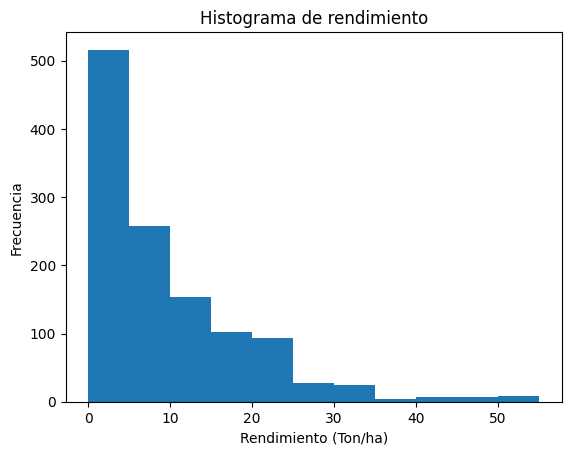

In [80]:
#Histogramas de las variables numericas

plt.hist(df['rendimiento (t/ha)'], bins=11, range=(0, 55))
plt.title('Histograma de rendimiento')
plt.xlabel('Rendimiento (Ton/ha)')
plt.ylabel('Frecuencia')
plt.show()

# **Preparación de los datos**

In [81]:
# Revisar númer de valores duplicados
df.duplicated().sum()

0

In [82]:
# Revisar valores faltantes
df.isna().sum()

departamento                     0
provincia                        0
código dane municipio            0
municipio                        0
desagregación cultivo            0
cultivo                          0
ciclo del cultivo                0
grupo cultivo                    0
subgrupo                         0
año                              0
periodo                          0
área sembrada (ha)               0
área cosechada (ha)              0
producción (t)                   0
rendimiento (t/ha)               0
código del cultivo               0
nombre científico del cultivo    0
estado físico del cultivo        0
dtype: int64

In [83]:
df['rendimiento (t/ha)'].value_counts(dropna=False) #REVISAR DATOS FALTANTES

rendimiento (t/ha)
10.00    86
8.00     78
7.00     69
1.50     66
20.00    45
         ..
0.67      1
0.97      1
70.00     1
21.50     1
2.20      1
Name: count, Length: 176, dtype: int64

In [84]:
df['rendimiento (t/ha)'].value_counts(dropna=True)

rendimiento (t/ha)
10.00    86
8.00     78
7.00     69
1.50     66
20.00    45
         ..
0.67      1
0.97      1
70.00     1
21.50     1
2.20      1
Name: count, Length: 176, dtype: int64

In [85]:
df.isnull()

,departamento,provincia,código dane municipio,municipio,desagregación cultivo,cultivo,ciclo del cultivo,grupo cultivo,subgrupo,año,periodo,área sembrada (ha),área cosechada (ha),producción (t),rendimiento (t/ha),código del cultivo,nombre científico del cultivo,estado físico del cultivo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
df.isnull().sum()

departamento                     0
provincia                        0
código dane municipio            0
municipio                        0
desagregación cultivo            0
cultivo                          0
ciclo del cultivo                0
grupo cultivo                    0
subgrupo                         0
año                              0
periodo                          0
área sembrada (ha)               0
área cosechada (ha)              0
producción (t)                   0
rendimiento (t/ha)               0
código del cultivo               0
nombre científico del cultivo    0
estado físico del cultivo        0
dtype: int64

In [87]:
df.isnull().sum().sum()

0

In [88]:
(len(df)-df.count()).sum()

0

In [89]:
median_age=df['rendimiento (t/ha)'].median(axis=0)

median_age #calculo de la mediana

7.0

In [90]:
df['rendimiento (t/ha)'].fillna(median_age,inplace=True)
df['rendimiento (t/ha)']

0        7.0
1        7.0
7       30.0
8       30.0
9       19.0
        ... 
2327     2.2
2328    18.0
2329    18.0
2330    14.0
2331    14.0
Name: rendimiento (t/ha), Length: 1237, dtype: float64

In [91]:
df.isnull().sum()

departamento                     0
provincia                        0
código dane municipio            0
municipio                        0
desagregación cultivo            0
cultivo                          0
ciclo del cultivo                0
grupo cultivo                    0
subgrupo                         0
año                              0
periodo                          0
área sembrada (ha)               0
área cosechada (ha)              0
producción (t)                   0
rendimiento (t/ha)               0
código del cultivo               0
nombre científico del cultivo    0
estado físico del cultivo        0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 2331
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   departamento                   1237 non-null   object 
 1   provincia                      1237 non-null   object 
 2   código dane municipio          1237 non-null   int64  
 3   municipio                      1237 non-null   object 
 4   desagregación cultivo          1237 non-null   object 
 5   cultivo                        1237 non-null   object 
 6   ciclo del cultivo              1237 non-null   object 
 7   grupo cultivo                  1237 non-null   object 
 8   subgrupo                       1237 non-null   object 
 9   año                            1237 non-null   int64  
 10  periodo                        1237 non-null   object 
 11  área sembrada (ha)             1237 non-null   float64
 12  área cosechada (ha)            1237 non-null   float6

In [93]:
print(df['municipio'].dtype)

object


In [94]:
import pandas as pd


# Calcular la frecuencia de cada categoría en la columna 'municipio'
frecuencia_municipio = df['municipio'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'cultivo'
frecuencia_cultivo = df['cultivo'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'periodo'
frecuencia_periodo = df['periodo'].value_counts()

# Mostrar los resultados

print("\nFrecuencia de cada categoría en la columna 'municipio':")
print(frecuencia_municipio)
print("\nFrecuencia de cada categoría en la columna 'cultivo':")
print(frecuencia_cultivo)
print("\nFrecuencia de cada categoría en la columna 'periodo':")
print(frecuencia_periodo)



Frecuencia de cada categoría en la columna 'municipio':
municipio
Pacho           20
San Cayetano    19
Manta           18
Quipile         18
Pandi           18
                ..
Chipaque         5
Tocancipá        5
Cogua            4
Nariño           4
Guataquí         3
Name: count, Length: 116, dtype: int64

Frecuencia de cada categoría en la columna 'cultivo':
cultivo
Maíz        322
Papa        192
Arveja      139
Frijol      129
Tomate      113
Yuca         76
Aguacate     71
Café         70
Limón        66
Plátano      59
Name: count, dtype: int64

Frecuencia de cada categoría en la columna 'periodo':
periodo
2022A    499
2022B    472
2022     266
Name: count, dtype: int64


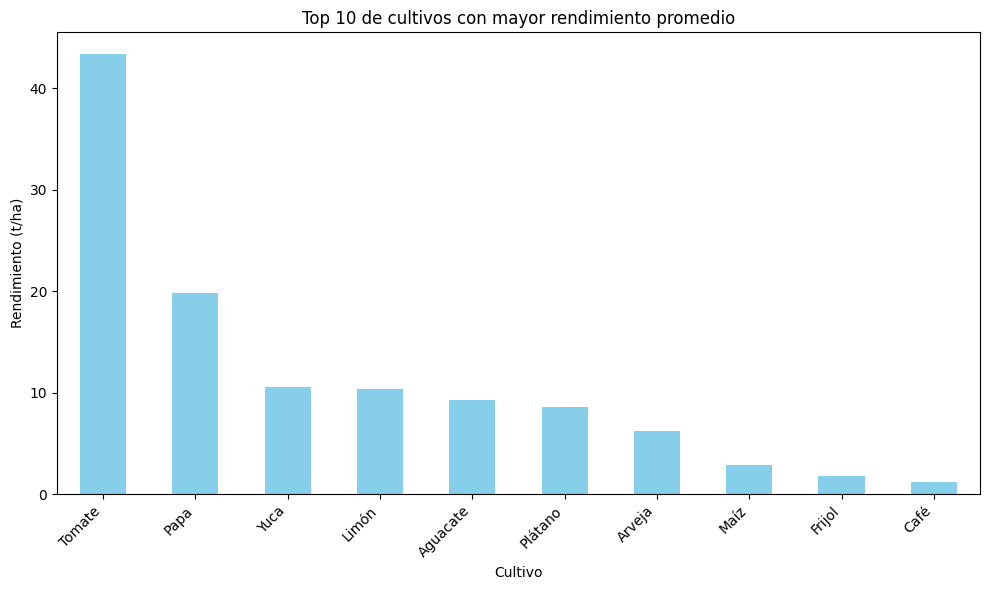

In [95]:
# Agrupar por cultivo y calcular la productividad media
productividad_promedio = df.groupby('cultivo')['rendimiento (t/ha)'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = productividad_promedio.plot(kind='bar', color='skyblue')


plt.title('Top 10 de cultivos con mayor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (t/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
df_numeric = df[["área cosechada (ha)", "rendimiento (t/ha)"]]

# Calculate the correlation matrix
df_numeric.corr()

,área cosechada (ha),rendimiento (t/ha)
área cosechada (ha),1.000000,0.035427
rendimiento (t/ha),0.035427,1.000000


In [97]:
new_df = df.copy()

In [98]:
new_df.columns

Index(['departamento', 'provincia', 'código dane municipio', 'municipio',
       'desagregación cultivo', 'cultivo', 'ciclo del cultivo',
       'grupo cultivo', 'subgrupo', 'año', 'periodo', 'área sembrada (ha)',
       'área cosechada (ha)', 'producción (t)', 'rendimiento (t/ha)',
       'código del cultivo', 'nombre científico del cultivo',
       'estado físico del cultivo'],
      dtype='object')

In [99]:
new_df = new_df.astype({"área sembrada (ha)": np.float32, "área cosechada (ha)": np.float32,
                    "producción (t)": np.float32, "rendimiento (t/ha)": np.float32})
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new_df['cultivo'] = le.fit_transform(new_df['cultivo'])
new_df['municipio'] = le.fit_transform(new_df['municipio'])
new_df['periodo'] = le.fit_transform(new_df['periodo'])

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df[["municipio", "periodo", "área cosechada (ha)",
                                                             "rendimiento (t/ha)"]], df['cultivo'], test_size=0.25, random_state=42)


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [102]:
print(x_train.shape,x_test.shape)

(927, 4) (310, 4)


In [103]:
y_train.value_counts()

cultivo
Maíz        242
Papa        142
Arveja      107
Frijol      100
Tomate       87
Yuca         55
Aguacate     55
Café         49
Limón        47
Plátano      43
Name: count, dtype: int64

In [104]:
x_train.shape[1]

4

In [105]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])



In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 300)               1500      
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 50)                7550      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 99910 (390.27 KB)
Trainable params: 9991

In [107]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [108]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

history = model.fit(x_train,
                      y_train_encoded,
                      epochs=100,
                      validation_data=(x_test, y_test_encoded)
                      )

Epoch 1/100
29/29 [==============================] - 1s 11ms/step - loss: 2.2966 - accuracy: 0.2050 - val_loss: 2.2806 - val_accuracy: 0.2871
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 2.2527 - accuracy: 0.2859 - val_loss: 2.2346 - val_accuracy: 0.2968
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 2.2065 - accuracy: 0.2913 - val_loss: 2.1920 - val_accuracy: 0.2903
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 2.1628 - accuracy: 0.2923 - val_loss: 2.1490 - val_accuracy: 0.2903
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 2.1171 - accuracy: 0.2977 - val_loss: 2.1025 - val_accuracy: 0.2935
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 2.0683 - accuracy: 0.3010 - val_loss: 2.0519 - val_accuracy: 0.3032
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 2.0163 - accuracy: 0.3042 - val_loss: 1.9984 - val_accuracy: 0.3065
Epoch 8/100


In [109]:
model.save('agricola.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
# Evaluación del Modelo
test_loss, test_acc = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_acc:.2f}")

10/10 [==============================] - 0s 2ms/step - loss: 0.8292 - accuracy: 0.6548
Test accuracy: 0.65


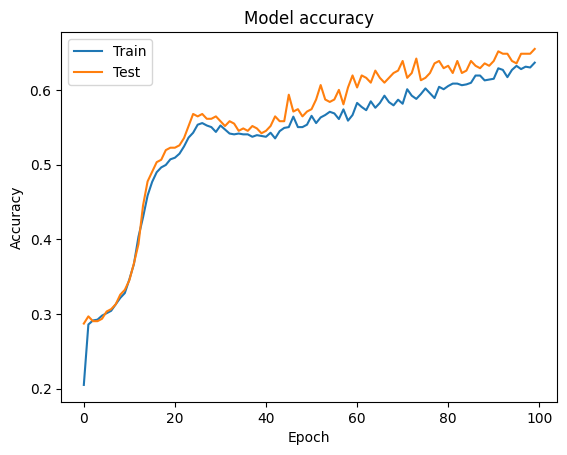

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [112]:

model.evaluate(x_test,y_test_encoded)

10/10 [==============================] - 0s 2ms/step - loss: 0.8292 - accuracy: 0.6548


[0.8292378187179565, 0.6548386812210083]

In [113]:
print(df.columns)

Index(['departamento', 'provincia', 'código dane municipio', 'municipio',
       'desagregación cultivo', 'cultivo', 'ciclo del cultivo',
       'grupo cultivo', 'subgrupo', 'año', 'periodo', 'área sembrada (ha)',
       'área cosechada (ha)', 'producción (t)', 'rendimiento (t/ha)',
       'código del cultivo', 'nombre científico del cultivo',
       'estado físico del cultivo'],
      dtype='object')


39/39 [==============================] - 0s 2ms/step


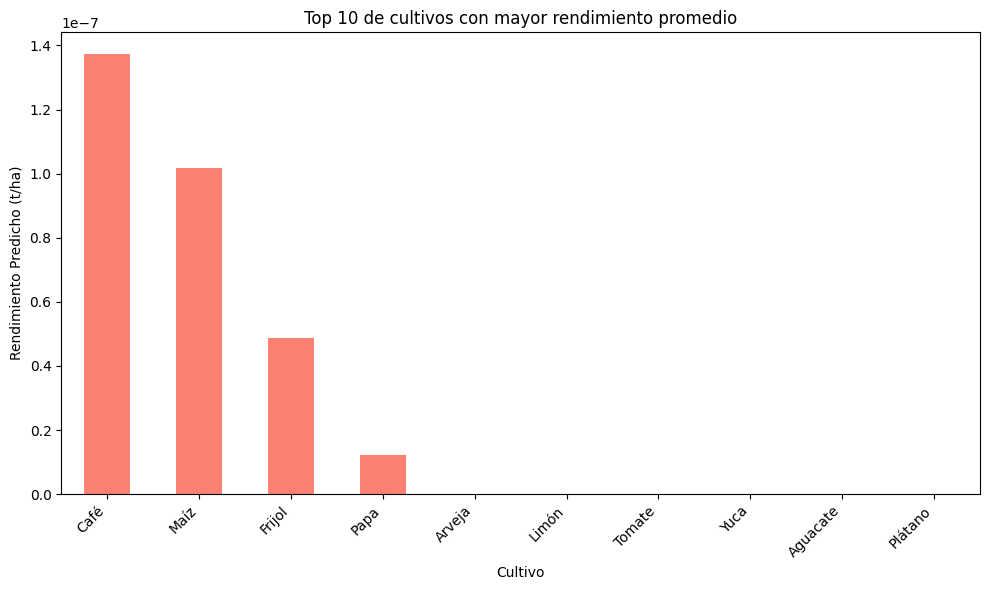

In [117]:
# ver la predicion del rendimiento del cultivo segun el modelo
input_features = ['cultivo', 'rendimiento (t/ha)', 'área cosechada (ha)', 'área sembrada (ha)']

# Crear un DataFrame con las columnas seleccionadas
model_input_df = df[input_features].copy()

# Convertir 'cultivo' a valores categóricos numéricos
model_input_df['cultivo'] = model_input_df['cultivo'].astype('category')
cultivo_categories = model_input_df['cultivo'].cat.categories
model_input_df['cultivo'] = model_input_df['cultivo'].cat.codes

# Cargar el modelo previamente entrenado
model = load_model('/content/agricola.h5')

# Realizar las predicciones
predictions = model.predict(model_input_df)

# Asegurarse de que las predicciones sean unidimensionales
if predictions.ndim > 1:
    predictions = predictions[:, 0]

# Añadir las predicciones al DataFrame original
df['predicted_yield'] = predictions

# Convertir los valores numéricos de 'cultivo' de vuelta a categorías ANTES de agregar las predicciones
df['cultivo'] = pd.Categorical.from_codes(model_input_df['cultivo'], categories=cultivo_categories) # Use the codes from the model input

# Agrupar por cultivo y calcular la productividad media
productividad_promedio = df.groupby('cultivo')['predicted_yield'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = productividad_promedio.plot(kind='bar', color='salmon')

plt.title('Top 10 de cultivos con mayor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento Predicho (t/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

39/39 [==============================] - 0s 2ms/step


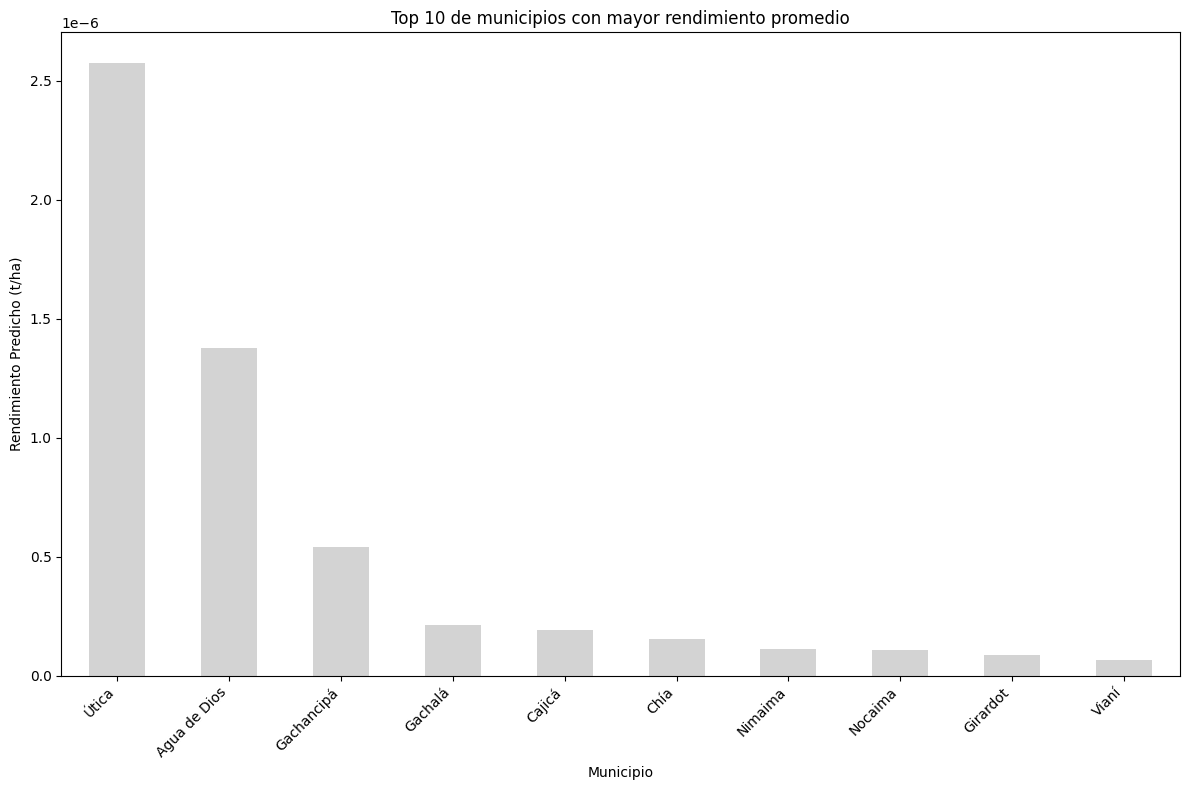

In [118]:
# ver la predicion del rendimiento del cultivo segun el modelo
input_features = ['cultivo', 'rendimiento (t/ha)', 'área cosechada (ha)', 'área sembrada (ha)']

# Crear un DataFrame con las columnas seleccionadas
model_input_df = df[input_features].copy()

# Convertir 'cultivo' a valores categóricos numéricos
model_input_df['cultivo'] = model_input_df['cultivo'].astype('category')
cultivo_categories = model_input_df['cultivo'].cat.categories
model_input_df['cultivo'] = model_input_df['cultivo'].cat.codes

# Cargar el modelo previamente entrenado
model = load_model('/content/agricola.h5')

# Realizar las predicciones
predictions = model.predict(model_input_df)

# Asegurarse de que las predicciones sean unidimensionales
if predictions.ndim > 1:
    predictions = predictions[:, 0]

# Añadir las predicciones al DataFrame original
df['predicted_yield'] = predictions

# Agrupar por municipio y calcular la productividad media
# Asegúrate de que 'municipio' esté en el DataFrame df
productividad_por_municipio = df.groupby('municipio')['predicted_yield'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = productividad_por_municipio.plot(kind='bar', color='lightgray')

plt.title('Top 10 de municipios con mayor rendimiento promedio')
plt.xlabel('Municipio')
plt.ylabel('Rendimiento Predicho (t/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
